In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Data Preparation

In [3]:
df = pd.read_csv('Jan_2019_ontime.csv')

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  583985 non-null  int64  
 9   ORIGIN                 583985 non-null  object 
 10  DEST_AIRPORT_ID        583985 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    583985 non-null  int64  
 12  DEST                   583985 non-null  object 
 13  DEP_TIME               567633 non-null  float64
 14  DEP_DEL15              567630 non-nu

- I have a dataset from Jan 2019 and I want to predict whether the flight will be delayd or not 
- In my dataset , we have two columns one for departure delay , and another one for arrival delay 
- we can create new column which has the flights delayed is it is departure delay or arrival delay 

In [7]:
# convert the two columns 'DEP_DEL15' and 'ARR_DEL15' from float to boolean
df['DEP_DEL15'] = df['DEP_DEL15'].astype(bool)
df['ARR_DEL15'] = df['ARR_DEL15'].astype(bool)

In [8]:
#test 
df['ARR_DEL15'].dtype

dtype('bool')

In [9]:
df['Delayed_Flights'] = df['DEP_DEL15'] | df['ARR_DEL15']

In [10]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21,Delayed_Flights
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,601.0,False,0600-0659,722.0,False,0.0,0.0,300.0,NaN,False
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,1359.0,False,1400-1459,1633.0,False,0.0,0.0,596.0,NaN,False
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,1215.0,False,1200-1259,1329.0,False,0.0,0.0,229.0,NaN,False
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,False,1500-1559,1625.0,False,0.0,0.0,223.0,NaN,False
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,False,1900-1959,1940.0,False,0.0,0.0,579.0,NaN,False


In [11]:
df['Delayed_Flights'] = df['Delayed_Flights'].astype(int)

In [12]:
df.sample(10)

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21,Delayed_Flights
505304,27,7,HA,19690,HA,N393HA,29,14747,1474703,SEA,13830,1383002,OGG,1004.0,False,1000-1059,1427.0,False,0.0,0.0,2640.0,NaN,0
574624,31,4,OO,20304,OO,N167SY,5282,12892,1289208,LAX,14771,1477104,SFO,1235.0,True,1200-1259,1403.0,True,0.0,0.0,337.0,NaN,1
573372,31,4,YV,20378,YV,N917FJ,5870,14107,1410702,PHX,15376,1537604,TUS,2136.0,True,2100-2159,2228.0,True,0.0,0.0,110.0,NaN,1
505740,27,7,DL,19790,DL,N947AT,1534,10397,1039707,ATL,13851,1385103,OKC,1401.0,False,1400-1459,1507.0,False,0.0,0.0,761.0,NaN,0
27769,2,3,AA,19805,AA,N183AN,2783,12478,1247805,JFK,11503,1150305,EGE,1029.0,False,1000-1059,1452.0,True,0.0,0.0,1746.0,NaN,1
444315,24,4,DL,19790,DL,N931DN,1655,14730,1473003,SDF,10397,1039707,ATL,652.0,False,0600-0659,851.0,False,0.0,0.0,321.0,NaN,0
274875,15,2,UA,19977,UA,N14118,1430,13830,1383002,OGG,11292,1129202,DEN,2124.0,False,2100-2159,641.0,False,0.0,0.0,3302.0,NaN,0
112280,6,7,AA,19805,AA,N997NN,114,12953,1295304,LGA,13930,1393007,ORD,1423.0,False,1400-1459,1610.0,False,0.0,0.0,733.0,NaN,0
151075,8,2,DL,19790,DL,N966AT,2066,10868,1086803,CAE,10397,1039707,ATL,1205.0,False,1200-1259,1315.0,False,0.0,0.0,192.0,NaN,0
542475,29,2,B6,20409,B6,N523JB,801,13204,1320402,MCO,14869,1486903,SLC,1829.0,False,1800-1859,2131.0,False,0.0,0.0,1931.0,NaN,0


In [13]:
df.Delayed_Flights.value_counts()

0    440724
1    143261
Name: Delayed_Flights, dtype: int64

In [14]:
df.CANCELLED == 1

0         False
1         False
2         False
3         False
4         False
          ...  
583980    False
583981    False
583982    False
583983    False
583984    False
Name: CANCELLED, Length: 583985, dtype: bool

In [15]:
print('total number of rows ',df.shape[0])

total number of rows  583985


In [16]:
cancelled_idx = df[df.CANCELLED == 1].index

In [17]:
cancelled_idx

Int64Index([   397,    403,    971,   1973,   1975,   1976,   1980,   1982,
              2007,   2018,
            ...
            583944, 583945, 583950, 583955, 583957, 583958, 583959, 583964,
            583966, 583967],
           dtype='int64', length=16726)

In [18]:
diverted_idx = df[df.DIVERTED == 1].index

In [19]:
df.drop(cancelled_idx,inplace=True)
df.drop(diverted_idx,inplace=True)

In [20]:
print('total number of rows ',df.shape[0])

total number of rows  565963


In [21]:
df.Delayed_Flights.value_counts()

0    440724
1    125239
Name: Delayed_Flights, dtype: int64

In [22]:
delayed_1 = df.loc[df.Delayed_Flights == 1]
delayed_0 = df.loc[df.Delayed_Flights == 0]

In [23]:
delayed_0.shape

(440724, 23)

In [24]:
delayed_1.shape

(125239, 23)

In [25]:
delayed_1.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21,Delayed_Flights
12,1,2,9E,20363,9E,N800AY,3291,11433,1143302,DTW,11267,1126702,DAY,1552.0,False,1500-1559,1738.0,True,0.0,0.0,166.0,NaN,1
16,1,2,9E,20363,9E,N232PQ,3295,11433,1143302,DTW,11618,1161802,EWR,1353.0,True,1200-1259,1521.0,True,0.0,0.0,488.0,NaN,1
22,1,2,9E,20363,9E,N349PQ,3300,10397,1039707,ATL,13795,1379502,OAJ,2216.0,False,2200-2259,16.0,True,0.0,0.0,399.0,NaN,1
43,1,2,9E,20363,9E,N832AY,3317,11778,1177801,FSM,10397,1039707,ATL,1550.0,False,1500-1559,1859.0,True,0.0,0.0,579.0,NaN,1
48,1,2,9E,20363,9E,N932XJ,3322,11433,1143302,DTW,12884,1288403,LAN,2036.0,False,2000-2059,2233.0,True,0.0,0.0,74.0,NaN,1


In [26]:
df_new = pd.concat([delayed_1,delayed_0.sample(n = 125239)])

In [27]:
df_new.shape

(250478, 23)

In [28]:
df_new.Delayed_Flights.value_counts()

1    125239
0    125239
Name: Delayed_Flights, dtype: int64

In [29]:
df_new.isnull().sum()

DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER                    0
TAIL_NUM                      0
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN                        0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST                          0
DEP_TIME                      0
DEP_DEL15                     0
DEP_TIME_BLK                  0
ARR_TIME                      0
ARR_DEL15                     0
CANCELLED                     0
DIVERTED                      0
DISTANCE                      0
Unnamed: 21              250478
Delayed_Flights               0
dtype: int64

In [30]:
# drop unnecessary columns 
df_new.drop(['OP_CARRIER_AIRLINE_ID','TAIL_NUM','OP_CARRIER_FL_NUM','ORIGIN_AIRPORT_ID',
            'ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_ID','DEST_AIRPORT_SEQ_ID','DEP_DEL15',
            'ARR_DEL15','CANCELLED','DIVERTED','Unnamed: 21','OP_CARRIER'],inplace=True,axis=1)

In [31]:
df_new.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_TIME_BLK,ARR_TIME,DISTANCE,Delayed_Flights
12,1,2,9E,DTW,DAY,1552.0,1500-1559,1738.0,166.0,1
16,1,2,9E,DTW,EWR,1353.0,1200-1259,1521.0,488.0,1
22,1,2,9E,ATL,OAJ,2216.0,2200-2259,16.0,399.0,1
43,1,2,9E,FSM,ATL,1550.0,1500-1559,1859.0,579.0,1
48,1,2,9E,DTW,LAN,2036.0,2000-2059,2233.0,74.0,1


In [32]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250478 entries, 12 to 46374
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DAY_OF_MONTH       250478 non-null  int64  
 1   DAY_OF_WEEK        250478 non-null  int64  
 2   OP_UNIQUE_CARRIER  250478 non-null  object 
 3   ORIGIN             250478 non-null  object 
 4   DEST               250478 non-null  object 
 5   DEP_TIME           250478 non-null  float64
 6   DEP_TIME_BLK       250478 non-null  object 
 7   ARR_TIME           250478 non-null  float64
 8   DISTANCE           250478 non-null  float64
 9   Delayed_Flights    250478 non-null  int32  
dtypes: float64(3), int32(1), int64(2), object(4)
memory usage: 20.1+ MB


# Exploratory Data Analysis

<AxesSubplot:>

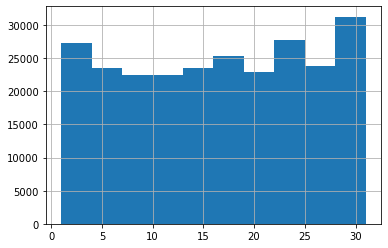

In [33]:
df_new['DAY_OF_MONTH'].hist()

<AxesSubplot:>

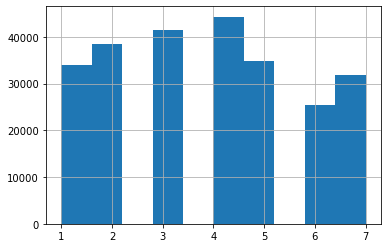

In [34]:
df_new['DAY_OF_WEEK'].hist()

array([[<AxesSubplot:title={'center':'DAY_OF_MONTH'}>,
        <AxesSubplot:title={'center':'DAY_OF_WEEK'}>],
       [<AxesSubplot:title={'center':'DEP_TIME'}>,
        <AxesSubplot:title={'center':'ARR_TIME'}>],
       [<AxesSubplot:title={'center':'DISTANCE'}>,
        <AxesSubplot:title={'center':'Delayed_Flights'}>]], dtype=object)

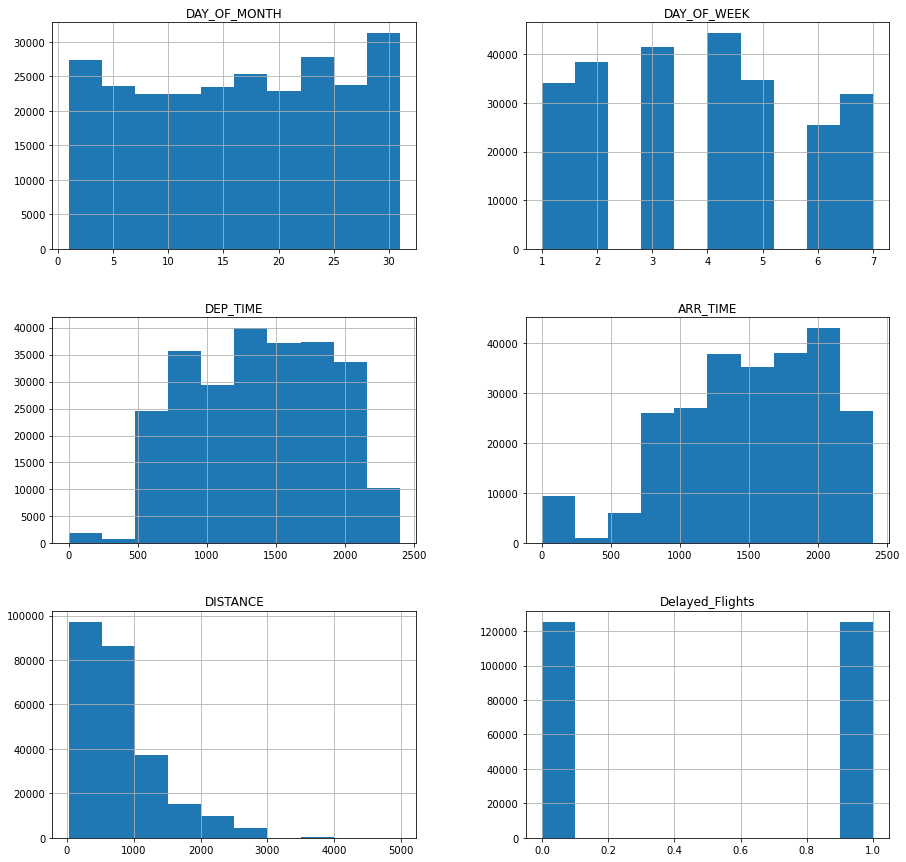

In [35]:
df_new.hist(figsize=(15,15))

In [36]:
df_new.describe()

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,ARR_TIME,DISTANCE,Delayed_Flights
count,250478.000000,250478.000000,250478.000000,250478.000000,250478.000000,250478.000000
mean,15.980445,3.842094,1384.264786,1511.421957,811.668570,0.500000
std,9.024585,1.915282,497.471225,549.301197,593.302808,0.500001
min,1.000000,1.000000,1.000000,1.000000,31.000000,0.000000
25%,8.000000,2.000000,959.000000,1129.000000,370.000000,0.000000
50%,16.000000,4.000000,1414.000000,1552.000000,651.000000,0.500000
75%,24.000000,5.000000,1808.000000,1946.000000,1052.000000,1.000000
max,31.000000,7.000000,2400.000000,2400.000000,4983.000000,1.000000


In [37]:
delayed_count = df_new.groupby('OP_UNIQUE_CARRIER')['Delayed_Flights'].apply(lambda x:(x==1).sum()).reset_index(name="Delayed Number")

In [38]:
delayed_count = delayed_count.sort_values("Delayed Number",ascending=False)

In [39]:
delayed_count

,OP_UNIQUE_CARRIER,Delayed Number
14,WN,21651
1,AA,16279
12,OO,15759
4,DL,12108
13,UA,10680
3,B6,7493
16,YX,6505
9,MQ,6444
0,9E,4551
11,OH,4151


<AxesSubplot:xlabel='OP_UNIQUE_CARRIER'>

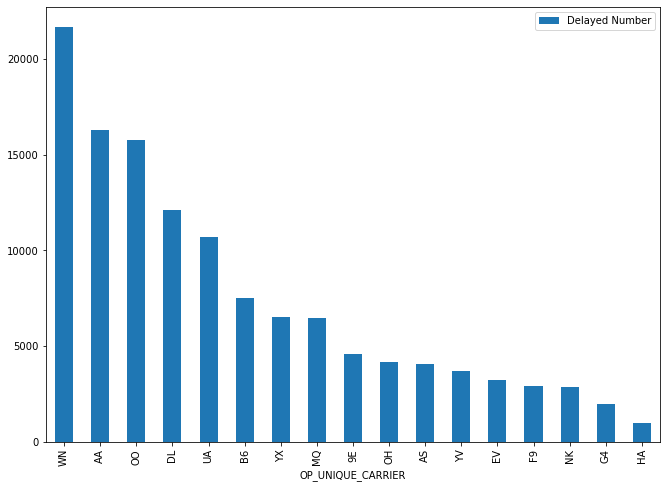

In [40]:
delayed_count.plot.bar(x='OP_UNIQUE_CARRIER',y='Delayed Number',figsize=(11,8))

the above plot shows that the high operation carriers and we found that WN operation carrier has largest number of delayed flights

In [41]:
undelayed_count = df_new.groupby('OP_UNIQUE_CARRIER')['Delayed_Flights'].apply(lambda x:(x==0).sum()).reset_index(name="undelayed Number")
undelayed_count = undelayed_count.sort_values("undelayed Number",ascending=False)

In [42]:
undelayed_count

,OP_UNIQUE_CARRIER,undelayed Number
14,WN,24168
4,DL,17538
1,AA,16935
12,OO,13205
13,UA,10142
16,YX,5164
11,OH,5051
9,MQ,4893
3,B6,4579
2,AS,4413


<AxesSubplot:xlabel='OP_UNIQUE_CARRIER'>

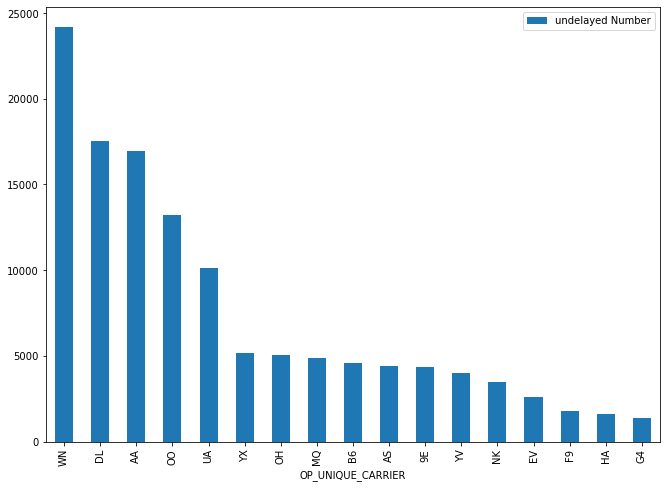

In [43]:
undelayed_count.plot.bar(x='OP_UNIQUE_CARRIER',y='undelayed Number',figsize=(11,8))

In [44]:
df_new.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST',
       'DEP_TIME', 'DEP_TIME_BLK', 'ARR_TIME', 'DISTANCE', 'Delayed_Flights'],
      dtype='object')

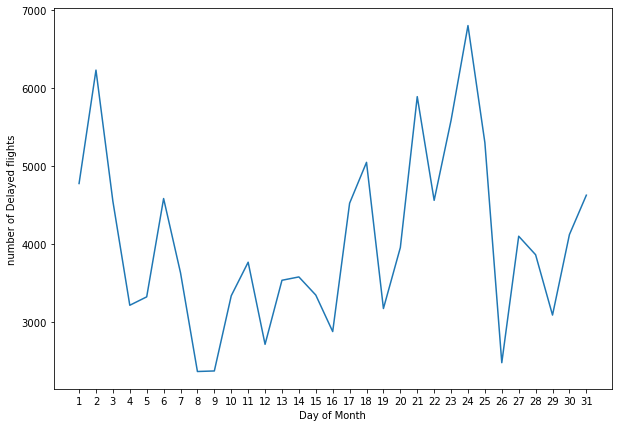

In [45]:
delayed_days_per_month = df_new.groupby('DAY_OF_MONTH')['Delayed_Flights'].apply(lambda x:(x==1).sum()).reset_index(name="delayed_flightss")
plt.figure(figsize=(10,7))
plt.xticks(delayed_days_per_month['DAY_OF_MONTH'])
plt.plot(delayed_days_per_month['DAY_OF_MONTH'],delayed_days_per_month['delayed_flightss'])
plt.xlabel('Day of Month')
plt.ylabel('number of Delayed flights');

In [46]:
distance_delayed = df_new[df_new['Delayed_Flights'] == 1]['DISTANCE'].values.mean()
distance_undelayed = df_new[df_new['Delayed_Flights'] == 0]['DISTANCE'].values.mean()

In [47]:
print("Average Distance delay",distance_delayed," mile")
print("Average Distance undelay",distance_undelayed," mile")

Average Distance delay 828.707846597306  mile
Average Distance undelay 794.6292927921813  mile


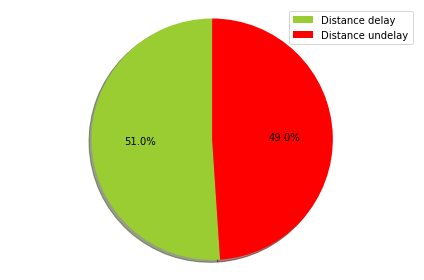

In [48]:
plt.pie([distance_delayed,distance_undelayed],colors=['yellowgreen','red'],shadow=True,startangle=90,autopct='%1.1f%%')
plt.legend(['Distance delay','Distance undelay'])
plt.tight_layout()
plt.axis('equal');

<AxesSubplot:xlabel='DAY_OF_WEEK'>

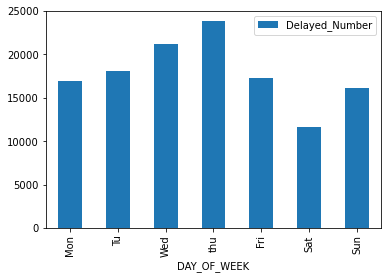

In [49]:
day_delayed = df.groupby('DAY_OF_WEEK')['Delayed_Flights'].apply(lambda x:(x==1).sum()).reset_index(name='Delayed_Number')
day_delayed.sort_values('Delayed_Number')
day_delayed['DAY_OF_WEEK'] = day_delayed['DAY_OF_WEEK'].map({1:'Mon',2:'Tu',3:'Wed',4:'thu',5:'Fri',6:'Sat',7:'Sun'})
day_delayed.plot.bar(x='DAY_OF_WEEK',y='Delayed_Number')

In [50]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250478 entries, 12 to 46374
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DAY_OF_MONTH       250478 non-null  int64  
 1   DAY_OF_WEEK        250478 non-null  int64  
 2   OP_UNIQUE_CARRIER  250478 non-null  object 
 3   ORIGIN             250478 non-null  object 
 4   DEST               250478 non-null  object 
 5   DEP_TIME           250478 non-null  float64
 6   DEP_TIME_BLK       250478 non-null  object 
 7   ARR_TIME           250478 non-null  float64
 8   DISTANCE           250478 non-null  float64
 9   Delayed_Flights    250478 non-null  int32  
dtypes: float64(3), int32(1), int64(2), object(4)
memory usage: 20.1+ MB


In [51]:
df_new['OP_UNIQUE_CARRIER'].unique()

array(['9E', 'AA', 'MQ', 'G4', 'OH', 'B6', 'YV', 'EV', 'F9', 'HA', 'YX',
       'NK', 'OO', 'WN', 'AS', 'UA', 'DL'], dtype=object)

In [52]:
category_columns = ['OP_UNIQUE_CARRIER','ORIGIN','DEST','DEP_TIME_BLK']

In [53]:
for i in category_columns:
    df_new[i] = df_new[i].astype('category')
    df_new[i] = df_new[i].cat.codes

In [54]:
df_new['OP_UNIQUE_CARRIER'].unique()

array([ 0,  1,  9,  7, 11,  3, 15,  5,  6,  8, 16, 10, 12, 14,  2, 13,  4],
      dtype=int8)

In [55]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250478 entries, 12 to 46374
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DAY_OF_MONTH       250478 non-null  int64  
 1   DAY_OF_WEEK        250478 non-null  int64  
 2   OP_UNIQUE_CARRIER  250478 non-null  int8   
 3   ORIGIN             250478 non-null  int16  
 4   DEST               250478 non-null  int16  
 5   DEP_TIME           250478 non-null  float64
 6   DEP_TIME_BLK       250478 non-null  int8   
 7   ARR_TIME           250478 non-null  float64
 8   DISTANCE           250478 non-null  float64
 9   Delayed_Flights    250478 non-null  int32  
dtypes: float64(3), int16(2), int32(1), int64(2), int8(2)
memory usage: 13.9 MB


# Machine Learning Model

In [56]:
# important modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [57]:
features = ['DAY_OF_MONTH','DAY_OF_WEEK','OP_UNIQUE_CARRIER','ORIGIN','DEST','DEP_TIME','DEP_TIME_BLK','ARR_TIME','DISTANCE']
x = df_new[features].values
y = df_new['Delayed_Flights'].values

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Logistic Regression Model

In [81]:
log_model = LogisticRegression(solver='liblinear',max_iter=100)
log_model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [82]:
train_score = log_model.score(x_train,y_train)
test_score = log_model.score(x_test,y_test)

In [84]:
print("the train accuracy is ",train_score *100 ,"%")
print("the test accuracy is ",test_score * 100 ,"%")

the train accuracy is  69.59407531614616 %
the test accuracy is  69.77802618971575 %


# Random Forest Model 

In [89]:
import time
t1 = time.time()
rf_model = RandomForestClassifier(n_estimators=350,max_depth=14)
rf_model.fit(x_train,y_train)
t2 = time.time()

In [90]:
print(t2-t1)

119.23944187164307


In [91]:
train_score =rf_model.score(x_train,y_train)
test_score = rf_model.score(x_test,y_test)

In [92]:
print("the train accuracy is ",train_score *100 ,"%")
print("the test accuracy is ",test_score * 100 ,"%")

the train accuracy is  84.7965386112525 %
the test accuracy is  80.59924944107314 %


# Decision Tree Model

In [124]:
dt_model = DecisionTreeClassifier(max_depth=16,min_samples_leaf=14)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=16, min_samples_leaf=14)

In [125]:
train_score =dt_model.score(x_train,y_train)
test_score = dt_model.score(x_test,y_test)

In [126]:
print("the train accuracy is ",train_score *100 ,"%")
print("the test accuracy is ",test_score * 100 ,"%")

the train accuracy is  81.77331297222305 %
the test accuracy is  78.9084956882785 %


# Neural Network Model

In [71]:
mlp_model = MLPClassifier(solver='adam',max_iter=2000,activation='relu')

In [72]:
mlp_model.fit(x_train,y_train)

MLPClassifier(max_iter=2000)

In [73]:
train_score =mlp_model.score(x_train,y_train)
test_score = mlp_model.score(x_test,y_test)

In [74]:
print("the train accuracy is ",train_score *100 ,"%")
print("the test accuracy is ",test_score * 100 ,"%")

the train accuracy is  77.65917098342166 %
the test accuracy is  77.72277227722772 %


# SVM Model 

In [ ]:
t1 = time.time()
svm_model = SVC()
svm_model.fit(x_train,y_train)
t2 = time.tim()
print(t2-t1)

In [ ]:
train_score =svm_model.score(x_train,y_train)
test_score = svm_model.score(x_test,y_test)

In [ ]:
print("the train accuracy is ",train_score *100 ,"%")
print("the test accuracy is ",test_score * 100 ,"%")